In [4]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data)
ride_data = pd.read_csv(ride_data)

#drop duplicates?
city_data = city_data.drop_duplicates('city')

# Combine the data into a single dataset
pyber_df = pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

['Urban' 'Suburban' 'Rural']


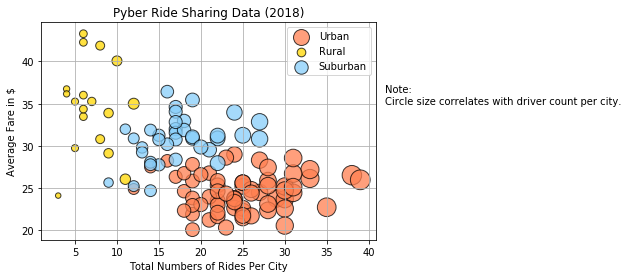

In [5]:
city_types = pyber_df["type"].unique()
print(city_types)
# Create data frames for each city type - Urban, Suburban and Rural
urban_city = pyber_df.loc[(pyber_df["type"] == "Urban")]
suburban_city = pyber_df.loc[(pyber_df["type"] == "Suburban")]
rural_city = pyber_df.loc[(pyber_df["type"] == "Rural")]

# Obtain the x and y coordinates for each of the three city types

x_urban= urban_city.groupby(['city']).count()['ride_id']
y_urban = urban_city.groupby(['city'])['fare'].mean()
s_urban = urban_city.groupby(['city'])['driver_count'].value_counts()

#_____________________

x_rural = rural_city.groupby(['city']).count()['ride_id']
y_rural = rural_city.groupby(['city'])['fare'].mean()
s_rural = rural_city.groupby(['city'])['driver_count'].value_counts()

#_____________________

x_suburban = suburban_city.groupby(['city']).count()['ride_id']
y_suburban = suburban_city.groupby(['city'])['fare'].mean()
s_suburban = suburban_city.groupby(['city'])['driver_count'].value_counts()

# Build the scatter plots for each city types
plt.scatter(x_urban, y_urban, label = "Urban", s=(s_urban * 10), color=["coral"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_rural, y_rural, label = "Rural", s=(s_rural * 10), color=["gold"], edgecolor="black", alpha = 0.75, marker="o")
plt.scatter(x_suburban, y_suburban, label = "Suburban", s=(s_suburban  * 10), color=["lightskyblue"], edgecolor="black",\
            alpha = 0.75, marker="o")
plt.grid()

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2018)")
plt.xlabel("Total Numbers of Rides Per City")
plt.ylabel("Average Fare in $")

# Create a legend
plt.legend(loc='upper right')

# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 10)

# Save Figure
plt.savefig("../Pyber/Pyber_Ride_Sharing.png")
plt.show()

## Total Fares by City Type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64


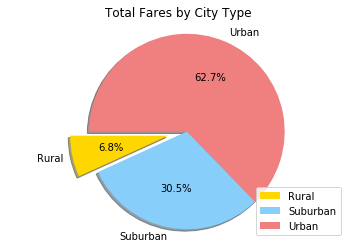

<Figure size 432x288 with 0 Axes>

In [6]:
# Calculate Type Percents

city_fare_pie = pyber_df.groupby(["type"])["fare"].sum()
print(city_fare_pie)

city_fare_pie.index

# Build Pie Chart

colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.2, 0, 0)

total_fares_pie = plt.pie(city_fare_pie, labels = city_fare_pie.index, autopct = "%1.1f%%", colors = colors,\
                          explode = explode, shadow = True, startangle = 180)

plt.title("Total Fares by City Type")
plt.axis("equal")
plt.legend(loc = "lower right")
plt.show()

# Save Figure
plt.savefig("../Pyber/Total_Fares_by_City_Type.png")


## Total Rides by City Type

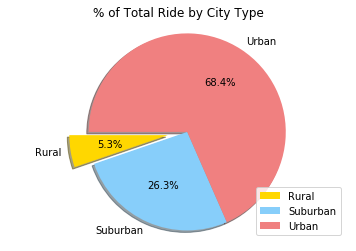

<Figure size 432x288 with 0 Axes>

In [7]:
# Calculate Ride Percents
city_rides_pie = pyber_df.groupby(["type"])["ride_id"].count()
city_rides_pie
city_rides_pie.index

# Build Pie Chart

colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.2, 0, 0)

total_rides_pie = plt.pie(city_rides_pie, labels = city_fare_pie.index, autopct = "%1.1f%%", colors = colors,\
                          explode = explode, shadow = True, startangle = 180)

plt.title("% of Total Ride by City Type")
plt.axis("equal")
plt.legend(loc = "lower right")
plt.show()

# Save Figure
plt.savefig("../Pyber/Total_Rides_by_City_Type.png")

## Total Drivers by City Type

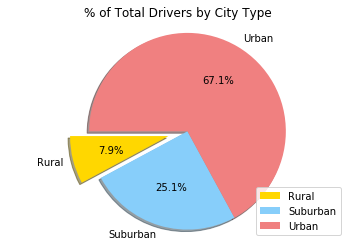

<Figure size 432x288 with 0 Axes>

In [8]:
# Calculate Driver Percents
city_drivers_pie = pyber_df.groupby(["type"])["driver_count"].mean()
city_drivers_pie

city_drivers_pie.index

# Build Pie Chart

colors = ["gold", "lightskyblue", "lightcoral"]

explode = (0.2, 0, 0)

total_drivers_pie = plt.pie(city_drivers_pie, labels = city_fare_pie.index, autopct = "%1.1f%%", colors = colors, explode = explode,\
        shadow = True, startangle = 180)

plt.title("% of Total Drivers by City Type")
plt.axis("equal")
plt.legend(loc = "lower right")
plt.show()

#save figure
plt.savefig("../Pyber/Total_Drivers_by_City_Type.png")